# Polynomial Regression

**Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the Data**

In [2]:
data = pd.read_csv("Advertising.csv")
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Extracting Independent and Dependent Features**

In [3]:
x = data.drop(columns="sales")
y = data["sales"]

**Convert the Independent Features to the Polynomial Features**

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
x = poly_feat.fit_transform(x)

**Splitting the Independent Features into the Training and Testing**

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

**Implementing the Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)

**Evaluating the Performance Matrices**

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.48186635794211086
Mean Squared Error: 0.9278680370080086
Root Mean Squared Error: 0.9632590705557922


In [8]:
regression.coef_

array([ 4.76340343e-02,  3.16585291e-02,  1.32739041e-03, -9.64441459e-05,
        1.03750601e-03, -8.86738017e-06,  2.56072688e-04, -6.44609336e-05,
        3.19786689e-05])

**Applying the different degree meta parameters on the Features to get the good performance**

In [9]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_converter.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.2, random_state=17)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    train_rmse_errors.append(np.sqrt(mean_squared_error(y_train, x_pred)))
    test_rmse_errors.append(np.sqrt(mean_squared_error(y_test, y_pred)))

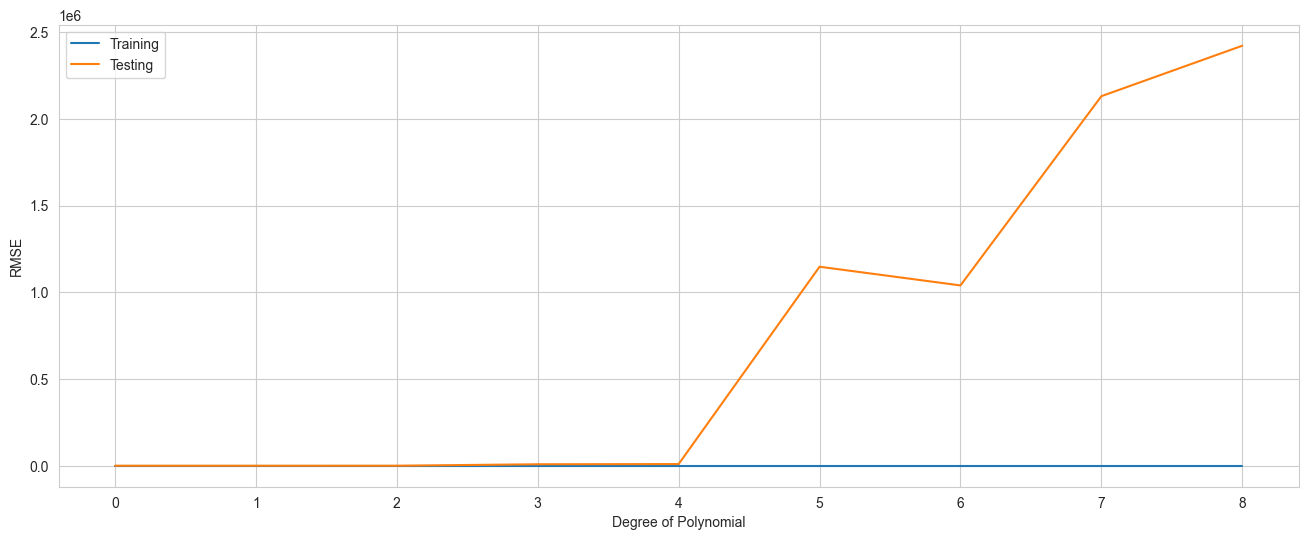

In [10]:
plt.figure(figsize=(16, 6))
plt.plot(range(9), train_rmse_errors, label="Training")
plt.plot(range(9), test_rmse_errors, label="Testing")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend();

**Model Deployment**

In [11]:
final_poly_feat = PolynomialFeatures(degree=3, include_bias=False)
poly_feat = final_poly_feat.fit_transform(x)
final_model = LinearRegression()
final_model.fit(poly_feat, y)

LinearRegression()

In [12]:
from joblib import dump, load
dump(final_model, "Final Poly Model.joblib")
dump(final_poly_feat, "Final Polynomial Features.joblib")
final_model = load("Final Poly Model.joblib")
final_poly_feat = load("Final Polynomial Features.joblib")